# Clustering

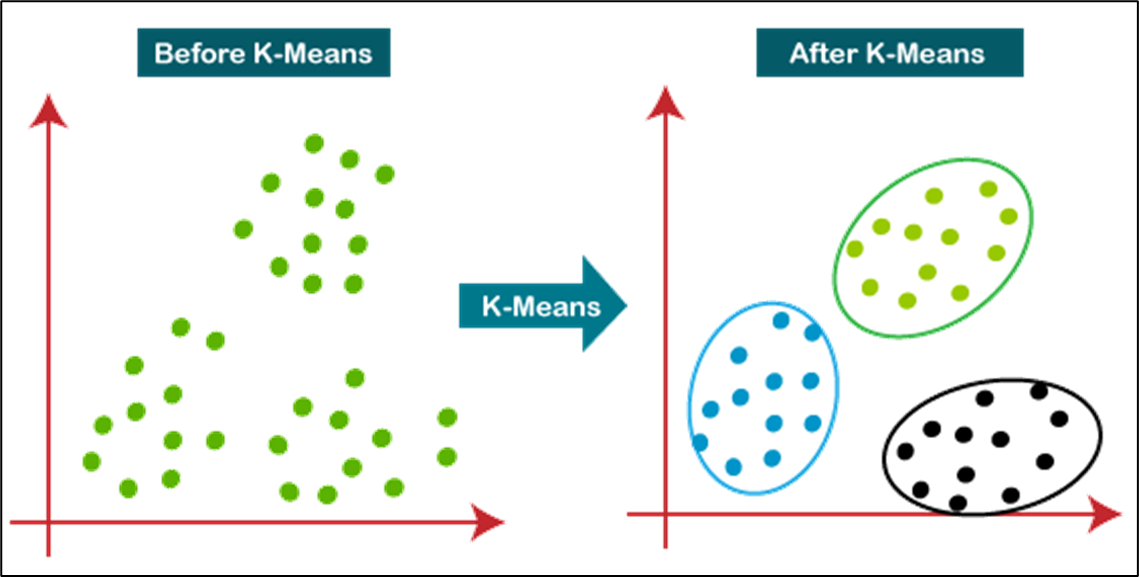

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

# Step 1 - Data Ingestion

In [2]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Categorize similar customers based on Income and Spending

# Step 2 - Perfom basic data quality checks

In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Spending      0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

# Step 3 - Seperate X value
Because this is unsupervised ML target feature Y is not there

In [7]:
X = df[["Income", "Spending"]]
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Income', ylabel='Spending'>

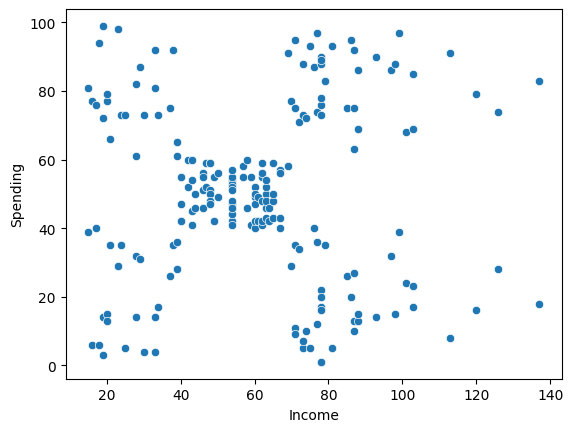

In [8]:
import seaborn as sns

sns.scatterplot(data=X, x="Income", y="Spending")

# Step 4 - Apply preprocessing on X

In [9]:
X.dtypes

Income      int64
Spending    int64
dtype: object

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = make_pipeline(SimpleImputer(strategy="median"), StandardScaler()).set_output(
    transform="pandas"
)

In [13]:
num_pipe.fit(X)

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [14]:
X_pre = num_pipe.transform(X)
X_pre.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


# Step 5 - Deciding optimal number of cluster using KMeans

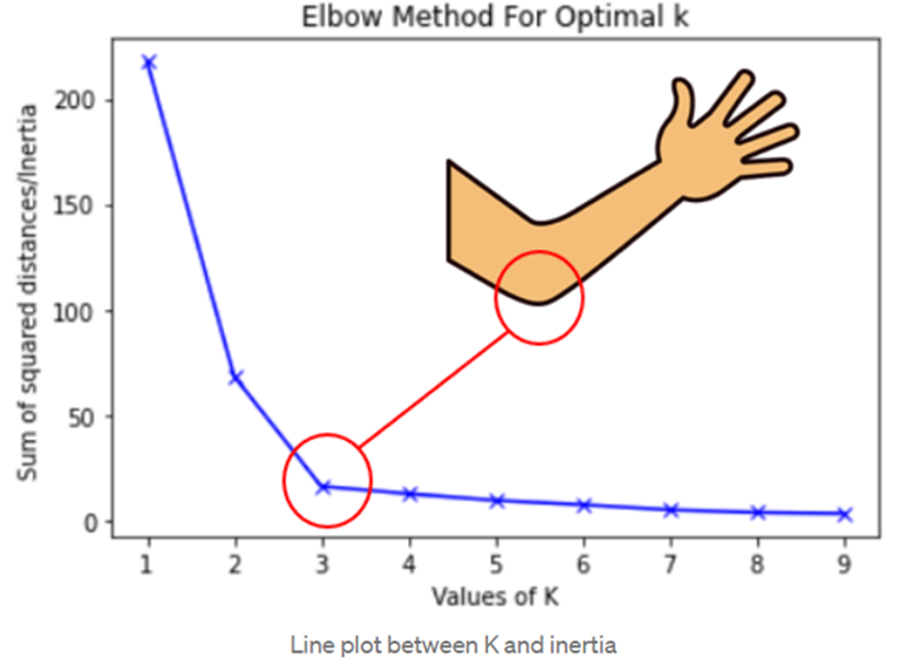

In [15]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=42)
km.fit(X_pre)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [16]:
km.inertia_

273.66888662642015

# Find inertia values for different k values

In [19]:
k = range(1, 15)
inertias = []
for i in k:
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X_pre)
    r = model.inertia_
    print(f"Cluster : {i}, Inertia : {r:.4f}")
    inertias.append(r)

Cluster : 1, Inertia : 400.0000
Cluster : 2, Inertia : 273.6689
Cluster : 3, Inertia : 157.7040
Cluster : 4, Inertia : 109.2282
Cluster : 5, Inertia : 65.5684
Cluster : 6, Inertia : 60.1329
Cluster : 7, Inertia : 49.6682
Cluster : 8, Inertia : 37.3191
Cluster : 9, Inertia : 32.4951
Cluster : 10, Inertia : 30.0593
Cluster : 11, Inertia : 26.7612
Cluster : 12, Inertia : 26.2329
Cluster : 13, Inertia : 23.1936
Cluster : 14, Inertia : 21.1953


# Find optimal k value using kneed library

In [18]:
!uv add kneed

Resolved 124 packages in 11.80s
Installed 1 package in 882ms
 + kneed==0.8.5


In [20]:
k

range(1, 15)

In [21]:
inertias

[400.00000000000006,
 273.66888662642015,
 157.7040081503594,
 109.22822707921344,
 65.56840815571681,
 60.13287487193421,
 49.668244837367986,
 37.31912287833883,
 32.49508119910091,
 30.0593226940422,
 26.761201766361214,
 26.232893769786838,
 23.1935534219784,
 21.195257238649535]

In [22]:
from kneed import KneeLocator

knee = KneeLocator(k, inertias, curve="convex", direction="decreasing")
best_k = knee.elbow
print(f"Elbow at k = {best_k}")

Elbow at k = 5


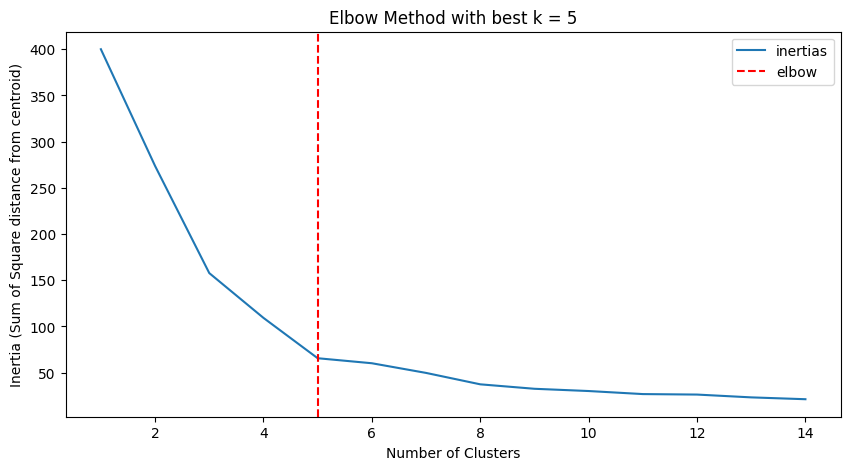

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.lineplot(x=k, y=inertias, label="inertias")
plt.axvline(x=best_k, color="red", linestyle="--", label="elbow")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Square distance from centroid)")
plt.title(f"Elbow Method with best k = {best_k}")
plt.legend()
plt.show()

# Step 6 - Fit the Kmeans model

In [24]:
best_kmeans = KMeans(n_clusters=best_k, random_state=42)
labels1 = best_kmeans.fit_predict(X_pre)
labels1

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [25]:
X1 = X.copy()
X1

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [26]:
X1["Label"] = labels1
X1

,Income,Spending,Label
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


In [27]:
X1[X1["Label"] == 0]

,Income,Spending,Label
43,39,61,0
46,40,55,0
47,40,47,0
48,40,42,0
49,40,42,0
...,...,...,...
121,67,40,0
122,69,58,0
126,71,35,0
132,72,34,0


In [28]:
X1[X1["Label"] == 1]

,Income,Spending,Label
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1


In [29]:
for i in range(best_k):
    print(f"Cluster {i}")
    display(X1[X1["Label"] == i])
    print("\n====================================================\n")

Cluster 0


,Income,Spending,Label
43,39,61,0
46,40,55,0
47,40,47,0
48,40,42,0
49,40,42,0
...,...,...,...
121,67,40,0
122,69,58,0
126,71,35,0
132,72,34,0




Cluster 1


,Income,Spending,Label
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1




Cluster 2


,Income,Spending,Label
1,15,81,2
3,16,77,2
5,17,76,2
7,18,94,2
9,19,72,2
11,19,99,2
13,20,77,2
15,20,79,2
17,21,66,2
19,23,98,2




Cluster 3


,Income,Spending,Label
124,70,29,3
128,71,11,3
130,71,9,3
134,73,5,3
136,73,7,3
138,74,10,3
140,75,5,3
144,77,12,3
146,77,36,3
148,78,22,3




Cluster 4


,Income,Spending,Label
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


# Step 7 - plot results

In [30]:
centroids1 = X1.groupby(by="Label").mean(numeric_only=True)
centroids1

,Income,Spending
Label,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


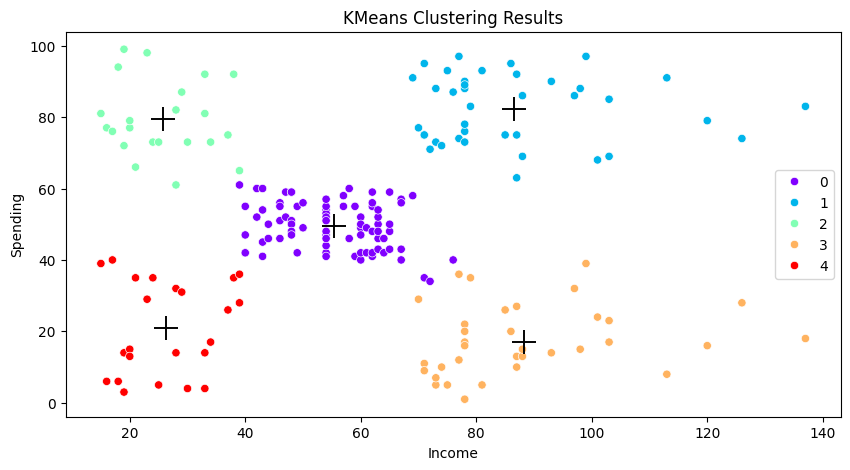

In [37]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=X1, x="Income", y="Spending", hue="Label", palette="rainbow")
sns.scatterplot(
    data=centroids1, x="Income", y="Spending", marker="+", color="black", s=300
)
plt.title("KMeans Clustering Results")
plt.show()

In [39]:
X1.to_csv("kmeans_res.csv", index=False)

In [40]:
# Save the model to joblib
import joblib

joblib.dump(best_kmeans, "kmeans.joblib")

['kmeans.joblib']

In [41]:
# Load the model
m1 = joblib.load("kmeans.joblib")
m1

,n_clusters,np.int64(5)
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


---
# 2. Agglomerative Clustering

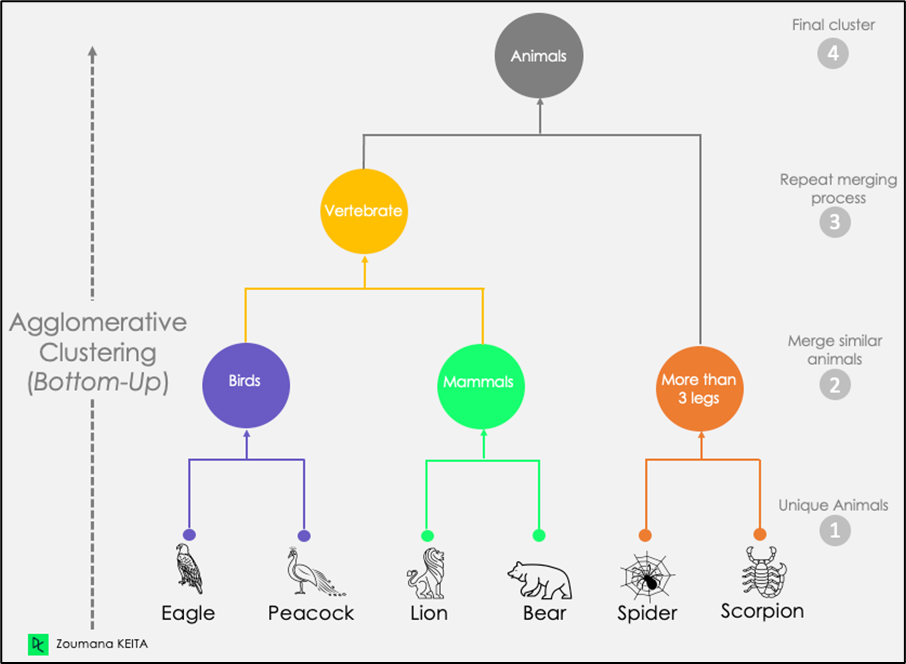

In [42]:
best_k

np.int64(5)

In [43]:
from sklearn.cluster import AgglomerativeClustering

model_agc = AgglomerativeClustering(n_clusters=best_k)
labels2 = model_agc.fit_predict(X_pre)
labels2

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [44]:
X2 = X.copy()
X2

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [45]:
X2["Label"] = labels2
X2

,Income,Spending,Label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,0
197,126,74,1
198,137,18,0


In [46]:
for i in range(best_k):
    print(f"Cluster : {i}")
    display(X2[X2["Label"] == i])
    print("\n========================================\n")

Cluster : 0


,Income,Spending,Label
128,71,11,0
130,71,9,0
134,73,5,0
136,73,7,0
138,74,10,0
140,75,5,0
144,77,12,0
148,78,22,0
150,78,17,0
152,78,20,0




Cluster : 1


,Income,Spending,Label
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1




Cluster : 2


,Income,Spending,Label
43,39,61,2
45,39,65,2
46,40,55,2
47,40,47,2
48,40,42,2
...,...,...,...
126,71,35,2
132,72,34,2
142,76,40,2
146,77,36,2




Cluster : 3


,Income,Spending,Label
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3
11,19,99,3
13,20,77,3
15,20,79,3
17,21,66,3
19,23,98,3




Cluster : 4


,Income,Spending,Label
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


In [47]:
centroids2 = X2.groupby(by="Label").mean(numeric_only=True)
centroids2

,Income,Spending
Label,,
0,89.406250,15.593750
1,86.538462,82.128205
2,55.811765,49.129412
3,25.095238,80.047619
4,26.304348,20.913043


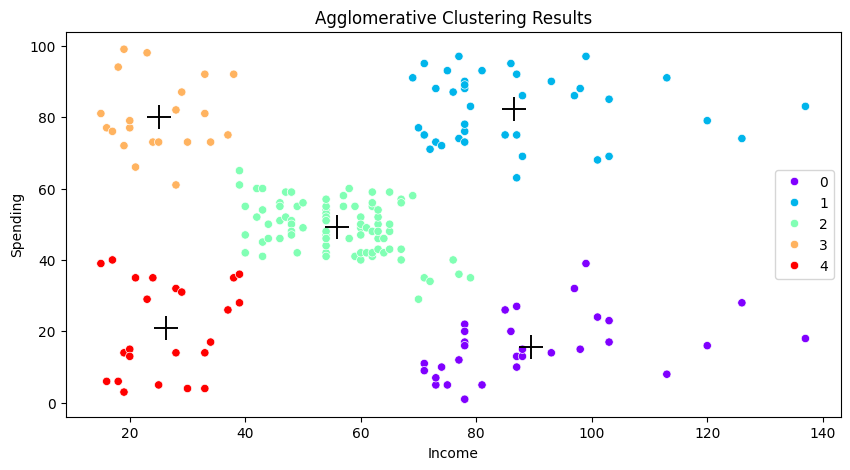

In [50]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=X2, x="Income", y="Spending", hue="Label", palette="rainbow")
sns.scatterplot(
    data=centroids2, x="Income", y="Spending", marker="+", color="black", s=300
)
plt.title("Agglomerative Clustering Results")
plt.show()

# Save results

In [51]:
X2.to_csv("Agglomerative.csv", index=False)

# Save agglomerative model

In [52]:
joblib.dump(model_agc, "agc_model.joblib")

['agc_model.joblib']

In [53]:
joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

# Load the preprocessor and model object

In [54]:
p = joblib.load("pre.joblib")
p

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [55]:
m = joblib.load("agc_model.joblib")
m

,n_clusters,np.int64(5)
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False
